# Super Heroes Dataset
One of our exercise during bootcamp in Eskwelabs <br>
Notebook by David


Data came from: <br>
    Source: Kaggle <br>
    Title: Super Heroes Dataset, How's your average superhero? <br>
    by:ClaudioDavi <br>
    link: https://www.kaggle.com/claudiodavi/superhero-set <br>
    
<img src="images/image (1).png"/>
 


## Description by ClaudioDavi
Super Heroes Dataset
Context
Super Heroes have been in popular culture for a long time and now more than ever. Since its creation, super heroes have not been very diverse, but that is changing rapidly. This dataset aims to provide an overview about heroes and their physical as well as power characteristics, helping researchers and curious minds identify trends and patterns.

Content
This data was collected in June/2017 from superherodb and not updated since, so it may not be up to date. There are two datasets here. The first one lists the characteristics of every super hero found on my source, the second contains information about every superpower and lists if they are present in any given hero.

Acknowledgements
This data was scraped from SuperHeroDb https://www.superherodb.com/.

Inspiration
What are the characteristics of your favorite super heroes?

## Dataset:

1. heroes_information.csv(48.04 KB) -This file holds the demographics of each hero as well as which comic/studio they originate from. <br>

2. super_hero_powers.csv(656.55 KB) - The format is Boolean. Each hero is listed under hero names and then each remain field has a TRUE/FALSE entry regarding if that hero has that power.

## My objectives for this project are following: <br>
 * practice with Pandas
 * data cleaning
 * visualization
 * providing insights
 * practice stats

# Let's begin

## import necessary libraries

In [1]:
#data manipulation
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Read the two datasets

In [2]:
#added parameter index_col to remove unnamed:0
df_heroes_info = pd.read_csv('data/heroes_information.csv', index_col = 0)

In [3]:
df_super_pow = pd.read_csv('data/super_hero_powers.csv')

## Explore the two raw datasets

### heroes_information.csv == df_heroes_info 

#### what it looks like

In [4]:
df_heroes_info.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [5]:
df_heroes_info.tail()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0
733,Zoom,Male,red,-,Brown,185.0,DC Comics,-,bad,81.0


In [6]:
df_heroes_info.sample(n = 5, random_state =42)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
559,Rick Flag,Male,blue,-,Brown,185.0,DC Comics,-,bad,85.0
33,Anti-Venom,Male,blue,Symbiote,Blond,229.0,Marvel Comics,-,-,358.0
275,Garbage Man,Male,-,Mutant,-,-99.0,DC Comics,-,good,-99.0
198,Danny Cooper,Male,brown,-,Blond,-99.0,HarperCollins,-,good,-99.0
192,Cy-Gor,Male,-,-,-,-99.0,Image Comics,-,bad,-99.0


Observation: We have negative weight

#### Shape of Data set

In [7]:
df_heroes_info.shape
#we have 734 rows and 10 columns

(734, 10)

#### type of Data set

In [8]:
df_heroes_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


Observation df_heroes_info: 
* 734 rows
* 10 columns
* data type: compose of objects and floats64
* missing values columns Publisher, Weight

#### Check missing values

In [9]:
df_heroes_info.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

#### Missing values in terms of percentage

In [10]:
df_heroes_info.isna().sum()/len(df_heroes_info)

name          0.000000
Gender        0.000000
Eye color     0.000000
Race          0.000000
Hair color    0.000000
Height        0.000000
Publisher     0.020436
Skin color    0.000000
Alignment     0.000000
Weight        0.002725
dtype: float64

#### another way of checking missing values (for smaller datasets)
credit to my teammate Stephene for this code

In [11]:
stats = []
for col in df_heroes_info.columns:
    stats.append((col, df_heroes_info[col].nunique(), df_heroes_info[col].isnull().sum() * 100 / df_heroes_info.shape[0], df_heroes_info[col].value_counts(normalize=True, dropna=False).values[0] * 100, df_heroes_info[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
6,Publisher,24,2.043597,52.861035,object
9,Weight,135,0.272480,32.288828,float64
0,name,715,0.000000,0.408719,object
1,Gender,3,0.000000,68.801090,object
2,Eye color,23,0.000000,30.653951,object
3,Race,62,0.000000,41.416894,object
4,Hair color,30,0.000000,23.433243,object
5,Height,54,0.000000,29.564033,float64
7,Skin color,17,0.000000,90.190736,object
8,Alignment,4,0.000000,67.574932,object


In [12]:
df_heroes_info.duplicated(subset='name').sum()

19

In [13]:
df_heroes_info[df_heroes_info.duplicated(subset='name')]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0
48,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,-,bad,126.0
50,Atom,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
63,Batgirl,Female,green,Human,Red,170.0,DC Comics,-,good,57.0
69,Batman,Male,blue,Human,Black,178.0,DC Comics,-,good,77.0
97,Black Canary,Female,blue,Metahuman,Blond,170.0,DC Comics,-,good,59.0
116,Blizzard,Male,-,-,Brown,-99.0,Marvel Comics,-,bad,-99.0
123,Blue Beetle,Male,-,-,-,-99.0,DC Comics,-,good,-99.0
156,Captain Marvel,Male,blue,Human,Black,193.0,DC Comics,-,good,101.0
260,Firestorm,Male,blue,Human,Auburn,188.0,DC Comics,-,good,91.0


In [14]:
df_heroes_info[df_heroes_info['name'] == 'Angel']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
22,Angel,Male,blue,-,Blond,183.0,Marvel Comics,-,good,68.0
23,Angel,Male,-,Vampire,-,-99.0,Dark Horse Comics,-,good,-99.0


In [15]:
df_heroes_info[df_heroes_info['name'] == 'Vindicator']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
695,Vindicator,Female,green,Human,Red,165.0,Marvel Comics,-,good,54.0
696,Vindicator,Male,-,-,-,-99.0,Marvel Comics,-,good,-99.0


In [16]:
df_heroes_info[df_heroes_info.duplicated()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
291,Goliath,Male,-,Human,-,-99.0,Marvel Comics,-,good,-99.0


Observation: 
* 19 have the same name but different attributes
* Only Goliath is the duplicated with all same attributes 

#### removing one duplicate

In [17]:
df_heroes_info = df_heroes_info[~df_heroes_info.duplicated()].reset_index(drop=True)

In [18]:
#(734, 10) to (733, 11)
df_heroes_info.shape

(733, 10)

#### number unique names

In [19]:
df_heroes_info['name'].nunique()

715

### super_hero_powers.csv == df_super_pow 

#### what it looks like

In [20]:
df_super_pow.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
df_super_pow.tail()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
662,Yellowjacket II,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
663,Ymir,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
664,Yoda,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
665,Zatanna,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
666,Zoom,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df_super_pow.sample(n = 5, random_state =42)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
660,X-Man,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
158,Claire Bennet,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
634,Venompool,True,True,False,True,False,True,True,False,False,...,True,False,False,True,False,False,False,False,False,False
235,Firestar,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
635,Vertigo II,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
#to see all the columns thank you pdeguzman96
pd.options.display.max_rows = df_super_pow.shape[1]
df_super_pow.head(2).T

,0,1
hero_names,3-D Man,A-Bomb
Agility,True,False
Accelerated Healing,False,True
Lantern Power Ring,False,False
Dimensional Awareness,False,False
Cold Resistance,False,False
Durability,False,True
Stealth,False,False
Energy Absorption,False,False
Flight,False,False


#### Shape of Data set

In [24]:
df_super_pow.shape

(667, 168)

#### type of data set

In [25]:
df_super_pow.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 168 columns):
hero_names                      object
Agility                         bool
Accelerated Healing             bool
Lantern Power Ring              bool
Dimensional Awareness           bool
Cold Resistance                 bool
Durability                      bool
Stealth                         bool
Energy Absorption               bool
Flight                          bool
Danger Sense                    bool
Underwater breathing            bool
Marksmanship                    bool
Weapons Master                  bool
Power Augmentation              bool
Animal Attributes               bool
Longevity                       bool
Intelligence                    bool
Super Strength                  bool
Cryokinesis                     bool
Telepathy                       bool
Energy Armor                    bool
Energy Blasts                   bool
Duplication                     bool
Size

#### Check missing values

In [26]:
df_super_pow.isna().sum()

hero_names                      0
Agility                         0
Accelerated Healing             0
Lantern Power Ring              0
Dimensional Awareness           0
Cold Resistance                 0
Durability                      0
Stealth                         0
Energy Absorption               0
Flight                          0
Danger Sense                    0
Underwater breathing            0
Marksmanship                    0
Weapons Master                  0
Power Augmentation              0
Animal Attributes               0
Longevity                       0
Intelligence                    0
Super Strength                  0
Cryokinesis                     0
Telepathy                       0
Energy Armor                    0
Energy Blasts                   0
Duplication                     0
Size Changing                   0
Density Control                 0
Stamina                         0
Astral Travel                   0
Audio Control                   0
Dexterity     

#### removing one duplicate

In [27]:
df_super_pow.duplicated(subset='hero_names').sum()

0

#### number unique names

In [28]:
df_super_pow['hero_names'].nunique()

667

Observation df_super_pow: 
* 667 rows
* 168 columns
* all unique hero_names
* data type: compose of one object and rest bool
* no missing data

## Merge both dataset 

In [29]:
#before we can merge the dataset we need to change name to hero_names

df_heroes_info = df_heroes_info.rename(columns={'name': 'hero_names'})

In [30]:
df_heroes_merged = pd.merge(df_heroes_info, df_super_pow, how = 'left')

In [31]:
df_heroes_merged.head()

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df_heroes_merged.shape

(733, 177)

In [33]:
df_heroes_merged.isna().sum()

hero_names                0
Gender                    0
Eye color                 0
Race                      0
Hair color                0
                         ..
Phoenix Force            73
Molecular Dissipation    73
Vision - Cryo            73
Omnipresent              73
Omniscient               73
Length: 177, dtype: int64

In [34]:
#let fix the name of columns 
df_heroes_merged.rename(columns={'hero_names': 'Heroes Name'}, inplace = True)

### Pit shop


In [35]:
#save it first just in case
df_heroes_merged2 = df_heroes_merged.copy()

In [36]:
df_heroes_merged2.head()

,Heroes Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,False,False,False,False,False,False,False,False,False,False


In [37]:
df_heroes_merged2['Web Creation'].value_counts()

False    644
True      16
Name: Web Creation, dtype: int64

### Replace True or False with 1 or 0s

In [38]:
df_heroes_merged = df_heroes_merged.replace(to_replace= (True, False), value = (1,0))

In [39]:
#checking if replaced were done correctly
df_heroes_merged['Web Creation'].value_counts()

0.0    644
1.0     16
Name: Web Creation, dtype: int64

### Value Counts

In [40]:
df_heroes_merged.select_dtypes(['object']).columns.values

array(['Heroes Name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Publisher', 'Skin color', 'Alignment'], dtype=object)

In [41]:
### let make a columns that we are interested
df_heroes_col = ['Gender', 'Eye color', 'Hair color','Publisher', 'Skin color', 'Alignment']

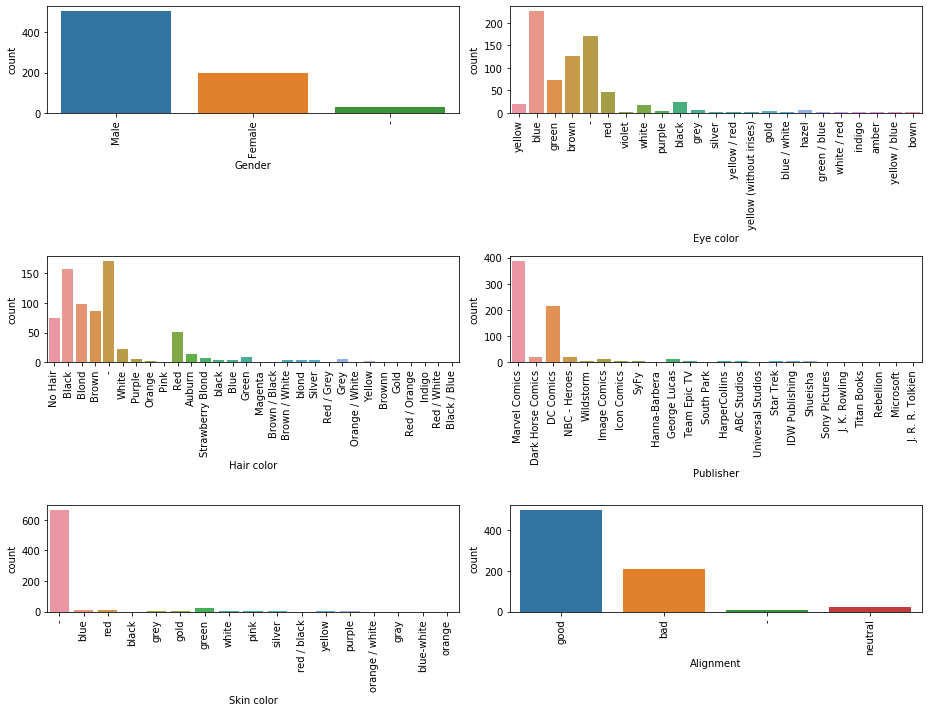

In [42]:
plt.figure(figsize=(13, 10))
i = 1
for col in df_heroes_col:
    plt.subplot(3, 2, i)
    
    sns.countplot(df_heroes_merged[col])
    plt.xticks(rotation=90)
    plt.tick_params(labelbottom=True)
    
    i += 1

plt.tight_layout()

In [43]:
df_heroes_merged.head()

,Heroes Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<img src="images/image (2).png"/>

In [44]:
df_heroes_merged['Phoenix Force'].value_counts() 

0.0    659
1.0      1
Name: Phoenix Force, dtype: int64

### Observations + How to deal with them
We have missing values <br>
We have - in columns Gender, Eye Color, Hair Color, Skin Color and Alignment <br>
we have values -99 in the columns of Height and Weight upon checking website - <br>
safe to say - are unknowns

Replace - with unknow, and -99 missing values

In [45]:
df_heroes_merged = df_heroes_merged.replace(to_replace= '-', value = 'Unknown')

In [46]:
# we can still use mean function even with missing values question. Is the value correct. Let's make an experiment
df_heroes_merged2['Web Creation'].mean()

0.024242424242424242

In [47]:
## experiment

x=  pd.Series([2, 3, np.nan, 4], dtype=pd.Int64Dtype())

In [48]:
x

0      2
1      3
2    NaN
3      4
dtype: Int64

In [49]:
x.mean()

3.0

In [50]:
np.mean([2,3,4])

3.0

### replace values of -99 with missing values

In [51]:
df_heroes_merged = df_heroes_merged.replace(to_replace= -99.0, value = np.NaN)

In [52]:
df_heroes_merged

,Heroes Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,Unknown,bad,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,Unknown,good,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
729,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731,Zatanna,Female,blue,Human,Black,170.0,DC Comics,Unknown,good,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


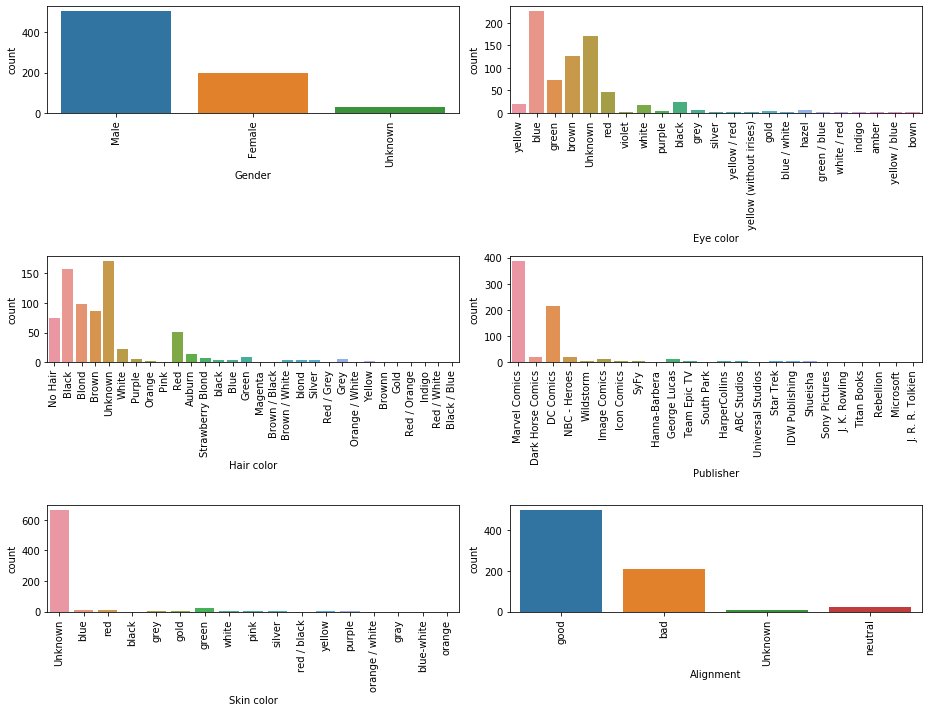

In [53]:
plt.figure(figsize=(13, 10))
i = 1
for col in df_heroes_col:
    plt.subplot(3, 2, i)
    
    sns.countplot(df_heroes_merged[col])
    plt.xticks(rotation=90)
    plt.tick_params(labelbottom=True)
    
    i += 1

plt.tight_layout()

## Insights from EDA
* Majority of our superheroes are male
* Blue eyes are has is the way to go
* Majority of the skin and hair color are unknown
* there are still more good superheroes than bad
* Marvel and DC Domics are top producers of superheroes


## Stats

1. Who is the tallest superhero
2. Top tallest superheroes
3. Who is the heaviest superhero
4. Who is lightest superhero
5. What is the average weight
6. What is the average height 

### Who is the heaviest superhero

In [54]:
df_heroes_merged[df_heroes_merged['Height']== df_heroes_merged['Height'].max()]

,Heroes Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
255,Fin Fang Foom,Male,red,Kakarantharaian,No Hair,975.0,Marvel Comics,green,good,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df_heroes_merged[df_heroes_merged['Height']== df_heroes_merged['Height'].max()]['Heroes Name']

255    Fin Fang Foom
Name: Heroes Name, dtype: object

<img src="images/image (3).png"/>

#### Dont do this because you are getting the max of Heroes Name which is the last letter of the Alphabet Z


In [56]:
#Zoom is not the tallest superhero. It was shown because of max name in the alphabet which start with Z
df_heroes_merged[['Heroes Name','Height']].max()

Heroes Name    Zoom
Height          975
dtype: object

### Top 10 tallest superheroes

In [57]:
df_height = df_heroes_merged[['Heroes Name', 'Height']].sort_values('Height', ascending = False)

In [58]:
df_height.head(10)

,Heroes Name,Height
255,Fin Fang Foom,975.0
272,Galactus,876.0
301,Groot,701.0
717,Wolfsbane,366.0
462,MODOK,366.0
574,Sasquatch,305.0
503,Onslaught,305.0
729,Ymir,304.8
556,Rey,297.0
372,Juggernaut,287.0


Text(0, 0.5, 'Height cm')

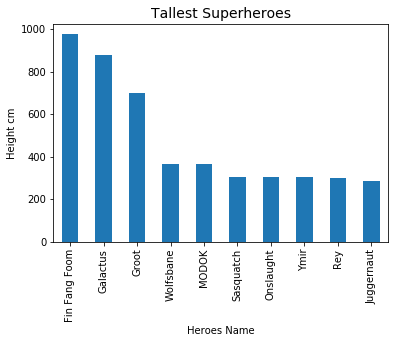

In [59]:
df_height.set_index('Heroes Name')[:10].plot.bar(legend = None)
plt.title("Tallest Superheroes", fontsize = 14)
plt.ylabel('Height cm')

### 3. Who is the heaviest superhero

In [60]:
df_heroes_merged[df_heroes_merged['Weight']== df_heroes_merged['Weight'].max()]

,Heroes Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
574,Sasquatch,Male,red,Unknown,Orange,305.0,Marvel Comics,Unknown,good,900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_heroes_merged[df_heroes_merged['Weight']== df_heroes_merged['Weight'].max()][['Heroes Name','Weight']]

,Heroes Name,Weight
574,Sasquatch,900.0


Sasquatch https://www.superherodb.com/sasquatch/10-863/
<img src="images/image (4).png"/>

In [62]:
df_weight = df_heroes_merged[['Heroes Name', 'Weight']].sort_values('Weight', ascending = False)

Text(0, 0.5, 'Weight Kg')

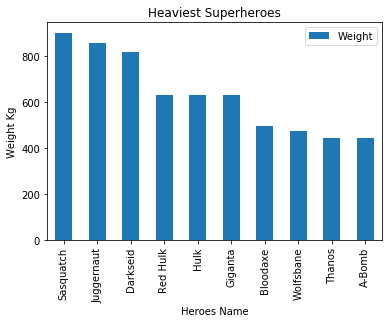

In [63]:
df_weight.set_index('Heroes Name')[:10].plot.bar()
plt.title("Heaviest Superheroes")
plt.ylabel('Weight Kg')

#### Thats weird Fin Fang Foom should be at least top on the list. Weight of Fin Fang Foom is based on tons that's why

Fin Fang Foom https://www.superherodb.com/fin-fang-foom/10-1518/

<img src="images/image (5).png"/>

#### Let's investigate and try to fix it :)

In [64]:
#height of superheroes can be a good bases of weight
df_heroes_merged[['Heroes Name', 'Height', 'Weight']].sort_values('Height', ascending = False)[:50]

,Heroes Name,Height,Weight
255,Fin Fang Foom,975.0,18.0
272,Galactus,876.0,16.0
301,Groot,701.0,4.0
717,Wolfsbane,366.0,473.0
462,MODOK,366.0,338.0
574,Sasquatch,305.0,900.0
503,Onslaught,305.0,405.0
729,Ymir,304.8,NaN
556,Rey,297.0,NaN
372,Juggernaut,287.0,855.0


#### Fin Fang Foom, Galactus, Groot original unit of weight is under tons. Need to convert it to kg. Before we can assume that Wolfsbane and rest will be in Kg. Let's check lightest  

In [65]:
df_weight_lt = df_heroes_merged[['Heroes Name', 'Weight']].sort_values('Weight', ascending = True)

In [66]:
df_weight_lt[:20]

,Heroes Name,Weight
345,Iron Monger,2.0
301,Groot,4.0
349,Jack-Jack,14.0
272,Galactus,16.0
730,Yoda,17.0
329,Howard the Duck,18.0
255,Fin Fang Foom,18.0
395,Krypto,18.0
567,Rocket Raccoon,25.0
208,Dash,27.0


#### Need to convert it to kg original unit of weight. 1 ton = 907.185kg.
Fin Fang Foom, Galactus, Groot, Iron Monger

In [67]:
conv_weight_hero = ['Fin Fang Foom', 'Galactus', 'Groot', 'Iron Monger']

In [68]:
#fObj[dfObj['Product'].isin(['Mangos', 'Grapes']) ]

df_heroes_merged[df_heroes_merged['Heroes Name'].isin(conv_weight_hero)][['Heroes Name','Height','Weight']]


,Heroes Name,Height,Weight
255,Fin Fang Foom,975.0,18.0
272,Galactus,876.0,16.0
301,Groot,701.0,4.0
345,Iron Monger,NaN,2.0


In [69]:
df_heroes_merged[df_heroes_merged['Weight'] == 18]

,Heroes Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
255,Fin Fang Foom,Male,red,Kakarantharaian,No Hair,975.0,Marvel Comics,green,good,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,Howard the Duck,Male,brown,Unknown,Yellow,79.0,Marvel Comics,Unknown,good,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,Krypto,Male,blue,Kryptonian,White,64.0,DC Comics,Unknown,good,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### It seems that we can't see replace because there are so same values so need to use other technique

In [70]:
##let fix it later
#df.xs('C')['x']=10
df_heroes_merged.xs(255)['Weight'] = 18*907.185

c:\users\lenovo\anaconda3\envs\sbad\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
df_heroes_merged[df_heroes_merged['Weight'] == 18]

,Heroes Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
255,Fin Fang Foom,Male,red,Kakarantharaian,No Hair,975.0,Marvel Comics,green,good,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
329,Howard the Duck,Male,brown,Unknown,Yellow,79.0,Marvel Comics,Unknown,good,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,Krypto,Male,blue,Kryptonian,White,64.0,DC Comics,Unknown,good,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df_heroes_merged.at[255,'Weight']= 16329 #255 index Fin Fang Foom 18tons to 16329kg
df_heroes_merged.at[272,'Weight']= 14515 #272index Galactus 16tons to 14515kg
df_heroes_merged.at[301,'Weight']= 3629 #301 index Groot 4tons to 3629kg
df_heroes_merged.at[345,'Weight']= 1814 #345 index Iron Monger 2tons to 1814.37kg


In [100]:
#check
df_heroes_merged[df_heroes_merged['Weight'] == 18]

,Heroes Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total powers
329,Howard the Duck,Male,brown,Unknown,Yellow,79.0,Marvel Comics,Unknown,good,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
395,Krypto,Male,blue,Kryptonian,White,64.0,DC Comics,Unknown,good,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0


In [101]:
df_weight_corrected = df_heroes_merged[['Heroes Name', 'Weight']].sort_values('Weight', ascending = False)

Text(0, 0.5, 'Weight Kg')

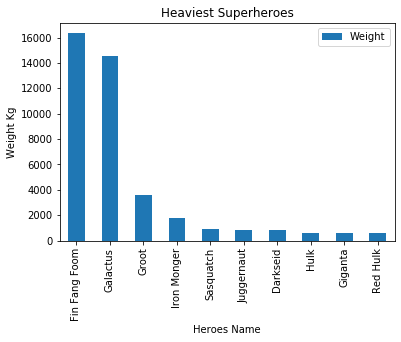

In [102]:
df_weight_corrected.set_index('Heroes Name')[:10].plot.bar()
plt.title("Heaviest Superheroes")
plt.ylabel('Weight Kg')

### 4. Who is the lightest superhero

In [104]:
df_heroes_merged[df_heroes_merged['Weight']== df_heroes_merged['Weight'].min()][['Heroes Name','Weight']]

,Heroes Name,Weight
349,Jack-Jack,14.0


## What is the average height

In [110]:
df_heroes_merged['Height'].mean()

186.72630560928434

## What is the average weight

In [111]:
df_heroes_merged['Weight'].mean()

185.47878787878787

### Answers to our Stats question

1. Who is the tallest superhero
 * Fin Fang Foom	from Marvel Comics with Height of 975.0cm or 32ft. It's about as tall as a Telephone Pole.<br>


2. Top 10 tallest superheroes
    * Fin Fang Foom	975.0, Galactus	876.0, Groot 701.0, Wolfsbane 366.0, MODOK 366.0, Sasquatch	305.0 Onslaught	305.0, Ymir	304.8, Rey 297.0, Juggernaut 287.0 <br>
    
3. Who is the heaviest superhero 
 * Sasquatch 900kg but based on the website Fin Fang Foom should be one of the top heaviest with 16329kg. Cause is because Weight is on kg and tons. During scraping but we already corrected it with the necessary adjustment
 
4. Who is lightest superhero
    * Jack Jack with 14kg
5. What is the average weight
    * 186.72cm

6. What is the average height 

 * 185.47kg
 

## BMI

<img src="images/image (6).png"/>

In [122]:
df_heroes_merged3 = df_heroes_merged.copy()

In [123]:
df_heroes_merged3['Height'] = df_heroes_merged3['Height'] * 0.01
df_heroes_merged3['bmi'] = df_heroes_merged3['Weight']/(df_heroes_merged3['Height'])**2

In [124]:
df_heroes_merged3

,Heroes Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total powers,bmi
0,A-Bomb,Male,yellow,Human,No Hair,2.030,Marvel Comics,Unknown,good,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,107.015458
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,1.910,Dark Horse Comics,blue,good,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,17.817494
2,Abin Sur,Male,blue,Ungaran,No Hair,1.850,DC Comics,red,good,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.296567
3,Abomination,Male,green,Human / Radiation,No Hair,2.030,Marvel Comics,Unknown,bad,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,107.015458
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,Unknown,bad,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,Yellowjacket II,Female,blue,Human,Strawberry Blond,1.650,Marvel Comics,Unknown,good,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,19.100092
729,Ymir,Male,white,Frost Giant,No Hair,3.048,Marvel Comics,white,good,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,NaN
730,Yoda,Male,brown,Yoda's species,White,0.660,George Lucas,green,good,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,39.026630
731,Zatanna,Female,blue,Human,Black,1.700,DC Comics,Unknown,good,57.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,19.723183


### Attributes

#### create total power columns

In [74]:
#total powers
df_heroes_merged['total powers'] = df_heroes_merged.iloc[:, 10:].sum(axis = 1)

In [75]:
df_heroes_merged.head()

,Heroes Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,total powers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,Unknown,bad,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0


In [76]:
df_super_total_pow= df_heroes_merged[['Heroes Name','total powers']]
df_super_total_pow= df_heroes_merged.sort_values('total powers',ascending=False)

Text(0.5, 1.0, 'Top 20 Superheroes having highest no. powers')

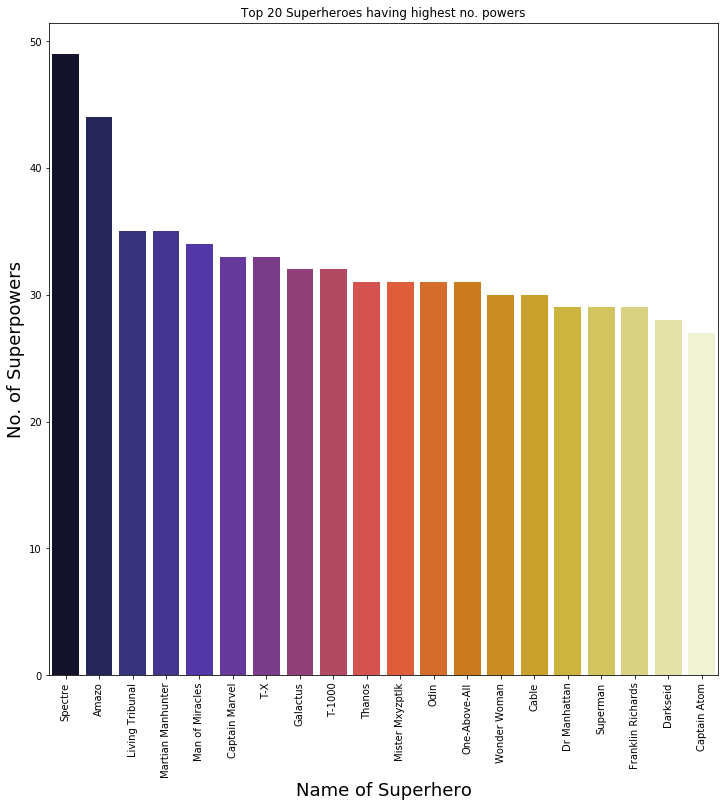

In [77]:
plt.figure(figsize= (12,12))
sns.barplot(x = 'Heroes Name', y = 'total powers', data = df_super_total_pow.head(21), palette='CMRmap')
plt.xticks(rotation = 90)
plt.xlabel("Name of Superhero",fontsize=18)
plt.ylabel("No. of Superpowers",fontsize=18)
plt.title('Top 20 Superheroes having highest no. powers')

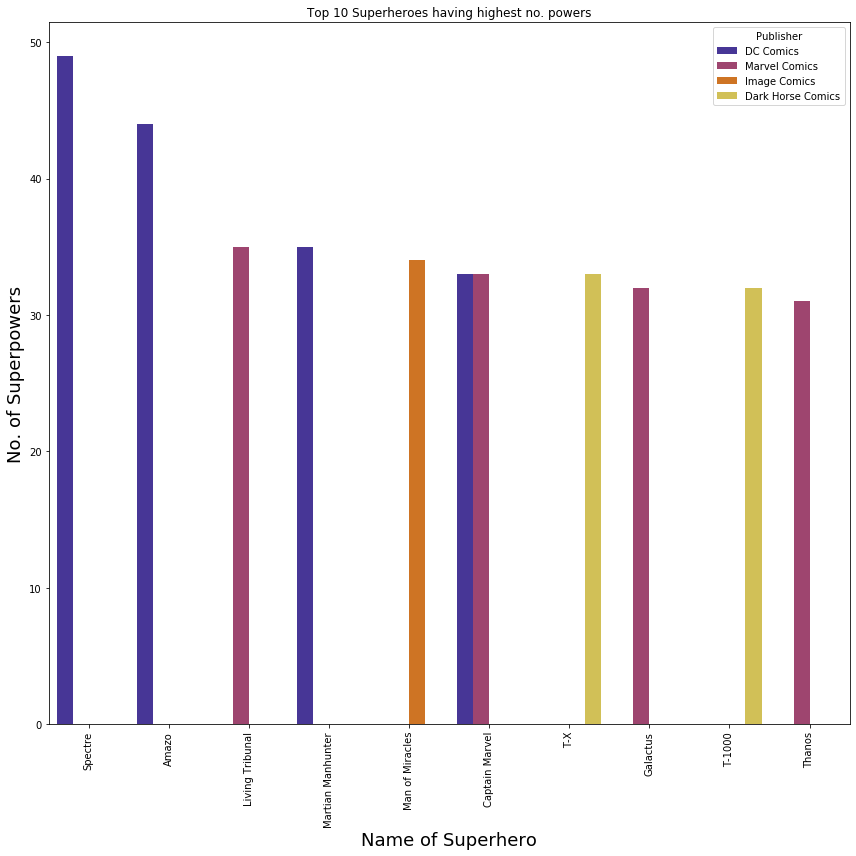

In [78]:
plt.figure(figsize= (12,12))
sns.barplot(x = 'Heroes Name', y = 'total powers', data = df_super_total_pow.head(11), palette="CMRmap", hue = 'Publisher')
plt.xticks(rotation = 90)
plt.xlabel("Name of Superhero",fontsize=18)
plt.ylabel("No. of Superpowers",fontsize=18)
plt.title('Top 10 Superheroes having highest no. powers')
plt.tight_layout()

### Does Batman have super powers beside being rich?



In [79]:
df_bat = df_heroes_merged[df_heroes_merged['Heroes Name'] == 'Batman'] 

In [80]:
df_bat = df_bat.iloc[0, 10:] == 1

In [81]:
df_bat[df_bat].index.tolist

<bound method IndexOpsMixin.tolist of Index(['Agility', 'Durability', 'Stealth', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Super Strength',
       'Stamina', 'Super Speed', 'Weapon-based Powers', 'Peak Human Condition',
       'Reflexes', 'Gliding', 'Power Suit', 'Vision - Night',
       'Vision - Infrared'],
      dtype='object')>

#### Does Batman have super powers beside being rich?
* 17 to be exact 'Agility',
 'Durability',
 'Stealth',
 'Underwater breathing',
 'Marksmanship',
 'Weapons Master',
 'Intelligence',
 'Super Strength',
 'Stamina',
 'Super Speed',
 'Weapon-based Powers',
 'Peak Human Condition',
 'Reflexes',
 'Gliding',
 'Power Suit',
 'Vision - Night',
 'Vision - Infrared'

### Top count of attributes used

In [82]:
df_heroes_merged['Agility'].sum()

244.0

In [83]:
df_heroes_merged['Agility'].value_counts()

0.0    416
1.0    244
Name: Agility, dtype: int64

In [84]:
df_heroes_merged.iloc[:, 10:].sum(axis = 0)

Agility                          244.0
Accelerated Healing              181.0
Lantern Power Ring                11.0
Dimensional Awareness             25.0
Cold Resistance                   49.0
Durability                       262.0
Stealth                          132.0
Energy Absorption                 77.0
Flight                           212.0
Danger Sense                      34.0
Underwater breathing              23.0
Marksmanship                     124.0
Weapons Master                   107.0
Power Augmentation                 8.0
Animal Attributes                 26.0
Longevity                        116.0
Intelligence                     158.0
Super Strength                   362.0
Cryokinesis                       20.0
Telepathy                         92.0
Energy Armor                       8.0
Energy Blasts                    148.0
Duplication                       17.0
Size Changing                     55.0
Density Control                   15.0
Stamina                  

In [85]:
attributes = pd.DataFrame(df_heroes_merged.iloc[:, 10:].sum(axis = 0))

In [86]:
attributes.rename(columns = {0:'Count'}, inplace = True)

In [87]:
attributes = attributes.reset_index()

In [88]:
attributes.rename(columns = {'index':'Attribute'}, inplace = True)

In [89]:
attributes.drop(index = 167, inplace = True)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

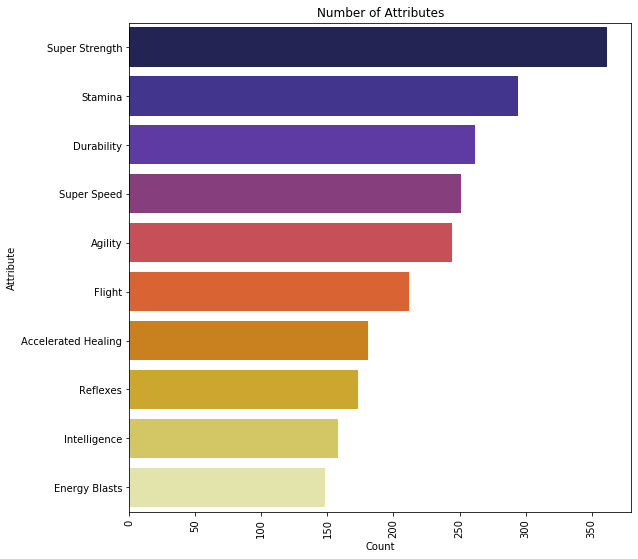

In [90]:
plt.figure(figsize= (9,9))
sns.barplot(x = 'Count', y = 'Attribute', data = attributes.sort_values('Count', ascending = False).head(10), palette='CMRmap')
plt.title('Number of Attributes')
plt.xticks(rotation = 90)


In [91]:
attributes[attributes['Count'] < 2]

,Attribute,Count
29,Omnitrix,1.0
42,Hyperkinesis,1.0
54,Electrical Transport,1.0
64,Anti-Gravity,1.0
101,Banish,1.0
108,Thirstokinesis,1.0
109,Hair Manipulation,1.0
113,Changing Armor,1.0
115,Biokinesis,1.0
120,Spatial Awareness,1.0


### Average attribute by a publisher

In [92]:
df_heroes_merged.groupby('Publisher')['total powers'].mean().sort_values(ascending= False)
#### J.R.R. Tolkien highest average of attributes

Publisher
J. R. R. Tolkien     20.000000
Shueisha             19.750000
J. K. Rowling        18.000000
Dark Horse Comics    13.388889
Wildstorm            11.000000
Microsoft            11.000000
George Lucas         10.214286
Hanna-Barbera        10.000000
Rebellion            10.000000
IDW Publishing        9.750000
DC Comics             9.004651
Star Trek             8.166667
Marvel Comics         7.927649
Image Comics          7.071429
Titan Books           7.000000
Team Epic TV          5.800000
Sony Pictures         5.500000
Icon Comics           3.250000
SyFy                  3.200000
Universal Studios     3.000000
South Park            3.000000
ABC Studios           1.750000
NBC - Heroes          1.631579
HarperCollins         1.166667
Name: total powers, dtype: float64

### Gender reference to Publisher

In [93]:
df_gender = df_heroes_merged.groupby(['Publisher','Gender'])[['Heroes Name']].count().copy()

In [94]:
df_gender

Heroes Name
Publisher         Gender              
ABC Studios       Female             2
                  Male               2
DC Comics         Female            61
                  Male             153
                  Unknown            1
Dark Horse Comics Female             5
                  Male              13
George Lucas      Female             2
                  Male              12
Hanna-Barbera     Male               1
HarperCollins     Female             2
                  Male               4
IDW Publishing    Male               4
Icon Comics       Female             1
                  Male               3
Image Comics      Female             2
                  Male              11
                  Unknown            1
J. K. Rowling     Male               1
J. R. R. Tolkien  Male               1
Marvel Comics     Female           111
                  Male             251
                  Unknown           25
Microsoft         Male               1
NBC - Heroes      Female             7
                  Male              12
Rebellion         Male               1
Shueisha          Male               4
Sony Pictures     Male               2
South Park        Male               1
Star Trek         Female             1
                  Male               5
SyFy              Female             2
                  Male               3
Team Epic TV      Female             1
                  Male               4
Titan Books       Male               1
Universal Studios Male               1
Wildstorm         Female             1
                  Male               2

In [95]:
df_gender = df_gender.unstack(level=-1)

In [96]:
df_gender['male_ratio'] =df_gender['Heroes Name']['Male']/(df_gender['Heroes Name']['Male'] +df_gender['Heroes Name']['Female'])

In [97]:
df_gender['male_ratio'].sort_values(ascending = False)
## George Lucas, Image Comics, Stra Trek has a high male ratio

Publisher
George Lucas         0.857143
Image Comics         0.846154
Star Trek            0.833333
Team Epic TV         0.800000
Icon Comics          0.750000
Dark Horse Comics    0.722222
DC Comics            0.714953
Marvel Comics        0.693370
Wildstorm            0.666667
HarperCollins        0.666667
NBC - Heroes         0.631579
SyFy                 0.600000
ABC Studios          0.500000
Hanna-Barbera             NaN
IDW Publishing            NaN
J. K. Rowling             NaN
J. R. R. Tolkien          NaN
Microsoft                 NaN
Rebellion                 NaN
Shueisha                  NaN
Sony Pictures             NaN
South Park                NaN
Titan Books               NaN
Universal Studios         NaN
Name: male_ratio, dtype: float64

### Ratio of Good in terms of Publisher

In [98]:
df_alig = df_heroes_merged.groupby(['Publisher','Alignment'])['Heroes Name'].count().unstack(level=-1).copy()
df_alig['ratio good'] = df_alig['good'] / (df_alig['good'] + df_alig['bad'])

In [99]:
df_alig.sort_values(by='ratio good', ascending= False).head(10)
# DC has more good than Marvel but a small margin

Alignment,Unknown,bad,good,neutral,ratio good
Publisher,,,,,
NBC - Heroes,NaN,3.0,16.0,NaN,0.842105
Team Epic TV,NaN,1.0,4.0,NaN,0.800000
Icon Comics,NaN,1.0,3.0,NaN,0.750000
Shueisha,NaN,1.0,3.0,NaN,0.750000
DC Comics,1.0,59.0,142.0,13.0,0.706468
Marvel Comics,3.0,115.0,258.0,11.0,0.691689
Dark Horse Comics,NaN,6.0,12.0,NaN,0.666667
Wildstorm,NaN,1.0,2.0,NaN,0.666667
George Lucas,NaN,6.0,8.0,NaN,0.571429
